The dataset includes eight key variables:

- year: The year of the observation
- month: The month of the observation
- stateDescription: The name of the state
- sectorName: The sector of the electricity market (residential, commercial, industrial, other, or all sectors)
- customers: The number of customers (missing for some observations)
- price: The average price of electricity per kilowatt-hour (kWh) in cents
- revenue: The total revenue generated from electricity sales in millions of dollars
- sales: The total electricity sales in millions of kilowatt-hours (kWh)


In [1]:
import pandas as pd

dataframe = pd.DataFrame(
   Any
)

**Series and Dataframe**

In [2]:
dataframe = pd.read_csv("clean_data.csv")

In [3]:
dataframe.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 non-null  float64
 5   price             85870 non-null  float64
 6   revenue           85870 non-null  float64
 7   sales             85870 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.2+ MB


In [7]:
dataframe['sectorName'].value_counts()

sectorName
all sectors       17174
commercial        17174
industrial        17174
residential       17174
transportation    15686
other              1488
Name: count, dtype: int64

In [24]:
# Year 2020, State Ohio , in different sectors , mean revenue ?

ohio_2020_df = dataframe[(dataframe['stateDescription'] == 'Ohio') & (dataframe['year'] == 2020)]
ohio_2020_df.groupby('sectorName')['sales'].sum()

sectorName
all sectors       142615.19905
commercial         43204.16504
industrial         46823.36502
residential        52552.77000
transportation        34.89901
Name: sales, dtype: float64

In [37]:
dataframe.loc[0:10,['month','year']]

,month,year
0,1,2001
1,1,2001
2,1,2001
3,1,2001
4,1,2001
5,1,2001
6,1,2001
7,1,2001
8,1,2001
9,1,2001


**Data Cleaning or manipulation**

In [39]:
# Handling Duplicates
dataframe.duplicated()
dataframe.drop_duplicates()

0        False
1        False
2        False
3        False
4        False
         ...  
85865    False
85866    False
85867    False
85868    False
85869    False
Length: 85870, dtype: bool

In [47]:
# Handling incorrect data
import numpy as np

# Create a dummy dataset
data = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'name': ['John', 'Jane', 'Bob', 'Alice', 'David'],
    'age': [25, -31, 42, 19, 37],
    'gender': ['M', 'F', 'M', 'F', 'Z'],
    'income': [50000, 70000, np.nan, '30000', 60000]
})
print("Dataset before Handling Incorrect Values")
print(data)

Dataset before Handling Incorrect Values
   id   name  age gender income
0   1   John   25      M  50000
1   2   Jane  -31      F  70000
2   3    Bob   42      M    NaN
3   4  Alice   19      F  30000
4   5  David   37      Z  60000


In [48]:
# Identify incorrect data
incorrect_age = data[(data['age'] <= 0) | (data['age'] > 100)]
incorrect_gender = data[~data['gender'].isin(['M', 'F'])]
incorrect_income = data[~data['income'].apply(lambda x: isinstance(x, (int, float)))]

In [50]:
# Delete incorrect data
data = data.drop(incorrect_age.index)
data = data.drop(incorrect_gender.index)
data = data.drop(incorrect_income.index)
data

,id,name,age,gender,income
0,1,John,25,M,50000
2,3,Bob,42,M,NaN


**Handling Null-values**

In [52]:
# dataframe.isna()
# dataframe.fillna()

**Outlier Detection**

<Axes: >

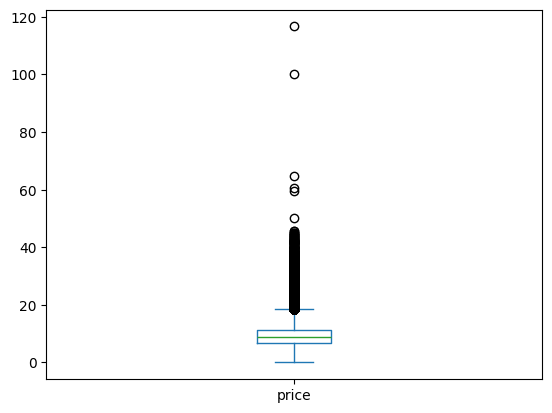

In [58]:
dataframe['price'].plot(kind='box')

In [59]:
# z -score

In [60]:
import scipy.stats as stats

In [68]:
z_score = stats.zscore(dataframe['price'])
filter_mask = (abs(z_score) < 5)
dataframe[filter_mask]

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591
...,...,...,...,...,...,...,...,...
85865,2024,1,Arkansas,all sectors,1717720.0,9.63,442.98773,4598.63147
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


**Writing A file**

In [69]:
dataframe.to_csv(
    'new_file.csv',
    index=False
)